In [ ]:
# Atividade Cap 3: Classificação de Grãos com Machine Learning (CRISP-DM)

GRUPO =
Giovani Saavedra	RM566797
Marcio Elifas	RM567871
Felipe Bernardo Papeleo de Oliveira	RM567782


## 1. Objetivo
Aplicar a metodologia CRISP-DM para desenvolver um modelo de aprendizado de máquina capaz de classificar três variedades de trigo (Kama, Rosa, Canadian) baseando-se em características físicas geométricas.

O dataset utilizado é o **"Seeds Dataset"** do UCI Machine Learning Repository.

In [ ]:
# Baixando arquivo Seeds para analise!

import gdown
import pandas as pd

# 1. ID Driver
file_id = '1hxzJy0kDr-W5yBteyyp2pmwCIt-05VEE'

# 2. Montando a URL de download direto do Google
url = f'https://drive.google.com/uc?id={file_id}'
output_file = 'seeds_dataset.txt'

# 3. Baixando o arquivo
gdown.download(url, output_file, quiet=False)

# 4. Carregando o dataset
colunas = [
    'Area', 'Perimetro', 'Compacidade', 'Comprimento_Nucleo',
    'Largura_Nucleo', 'Coefic_Assimetria', 'Comprimento_Sulco', 'Classe'
]

try:
    df = pd.read_csv(output_file, names=colunas, delim_whitespace=True)
    print("\n✅ Sucesso! Dataset carregado e pronto para uso.")
    display(df.head())
except Exception as e:
    print(f"❌ Erro ao ler o arquivo: {e}")

Downloading...
From: https://drive.google.com/uc?id=1hxzJy0kDr-W5yBteyyp2pmwCIt-05VEE
To: /content/seeds_dataset.txt
100%|██████████| 9.30k/9.30k [00:00<00:00, 9.19MB/s]


✅ Sucesso! Dataset carregado e pronto para uso.



/tmp/ipython-input-2984716968.py:23: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(output_file, names=colunas, delim_whitespace=True)


,Area,Perimetro,Compacidade,Comprimento_Nucleo,Largura_Nucleo,Coefic_Assimetria,Comprimento_Sulco,Classe
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


Importação das bibliotecas necessárias para manipulação de dados, visualização gráfica e algoritmos de Machine Learning.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas do Scikit-Learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Configuração de estilo
sns.set(style="whitegrid")
%matplotlib inline

Carregamento do arquivo seeds_dataset.txt diretamente do Google Drive. Como o arquivo original não possui cabeçalho, definimos os nomes das colunas conforme a documentação oficial.

In [ ]:
# Definição das colunas
colunas = [
    'Area', 'Perimetro', 'Compacidade', 'Comprimento_Nucleo',
    'Largura_Nucleo', 'Coefic_Assimetria', 'Comprimento_Sulco', 'Classe'
]

# Caminho do arquivo no Drive (Conforme seu print, está na pasta Colab Notebooks)
# Se der erro, verifique se o nome da pasta é exatamente "Colab Notebooks"
caminho_arquivo = '/content/drive/MyDrive/Colab Notebooks/seeds_dataset.txt'

try:
    df = pd.read_csv(caminho_arquivo, names=colunas, delim_whitespace=True)
    print("Dataset carregado com sucesso!")
    display(df.head())
except FileNotFoundError:
    print("Arquivo não encontrado! Verifique se o caminho '/content/drive/MyDrive/Colab Notebooks/seeds_dataset.txt' está correto.")

/tmp/ipython-input-274282056.py:12: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(caminho_arquivo, names=colunas, delim_whitespace=True)


Dataset carregado com sucesso!


,Area,Perimetro,Compacidade,Comprimento_Nucleo,Largura_Nucleo,Coefic_Assimetria,Comprimento_Sulco,Classe
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


Visualização da distribuição dos dados, verificação de valores nulos e análise de correlação entre as variáveis para entender quais atributos ajudam a distinguir as classes.

--- Informações do Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Area                210 non-null    float64
 1   Perimetro           210 non-null    float64
 2   Compacidade         210 non-null    float64
 3   Comprimento_Nucleo  210 non-null    float64
 4   Largura_Nucleo      210 non-null    float64
 5   Coefic_Assimetria   210 non-null    float64
 6   Comprimento_Sulco   210 non-null    float64
 7   Classe              210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.3 KB

--- Estatísticas Descritivas ---


,Area,Perimetro,Compacidade,Comprimento_Nucleo,Largura_Nucleo,Coefic_Assimetria,Comprimento_Sulco,Classe
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


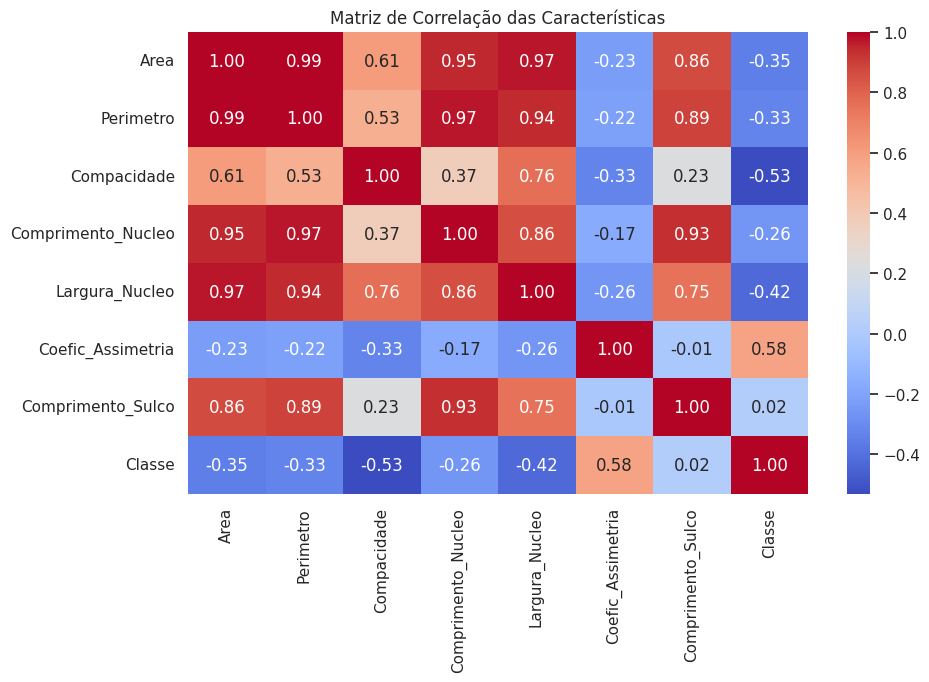

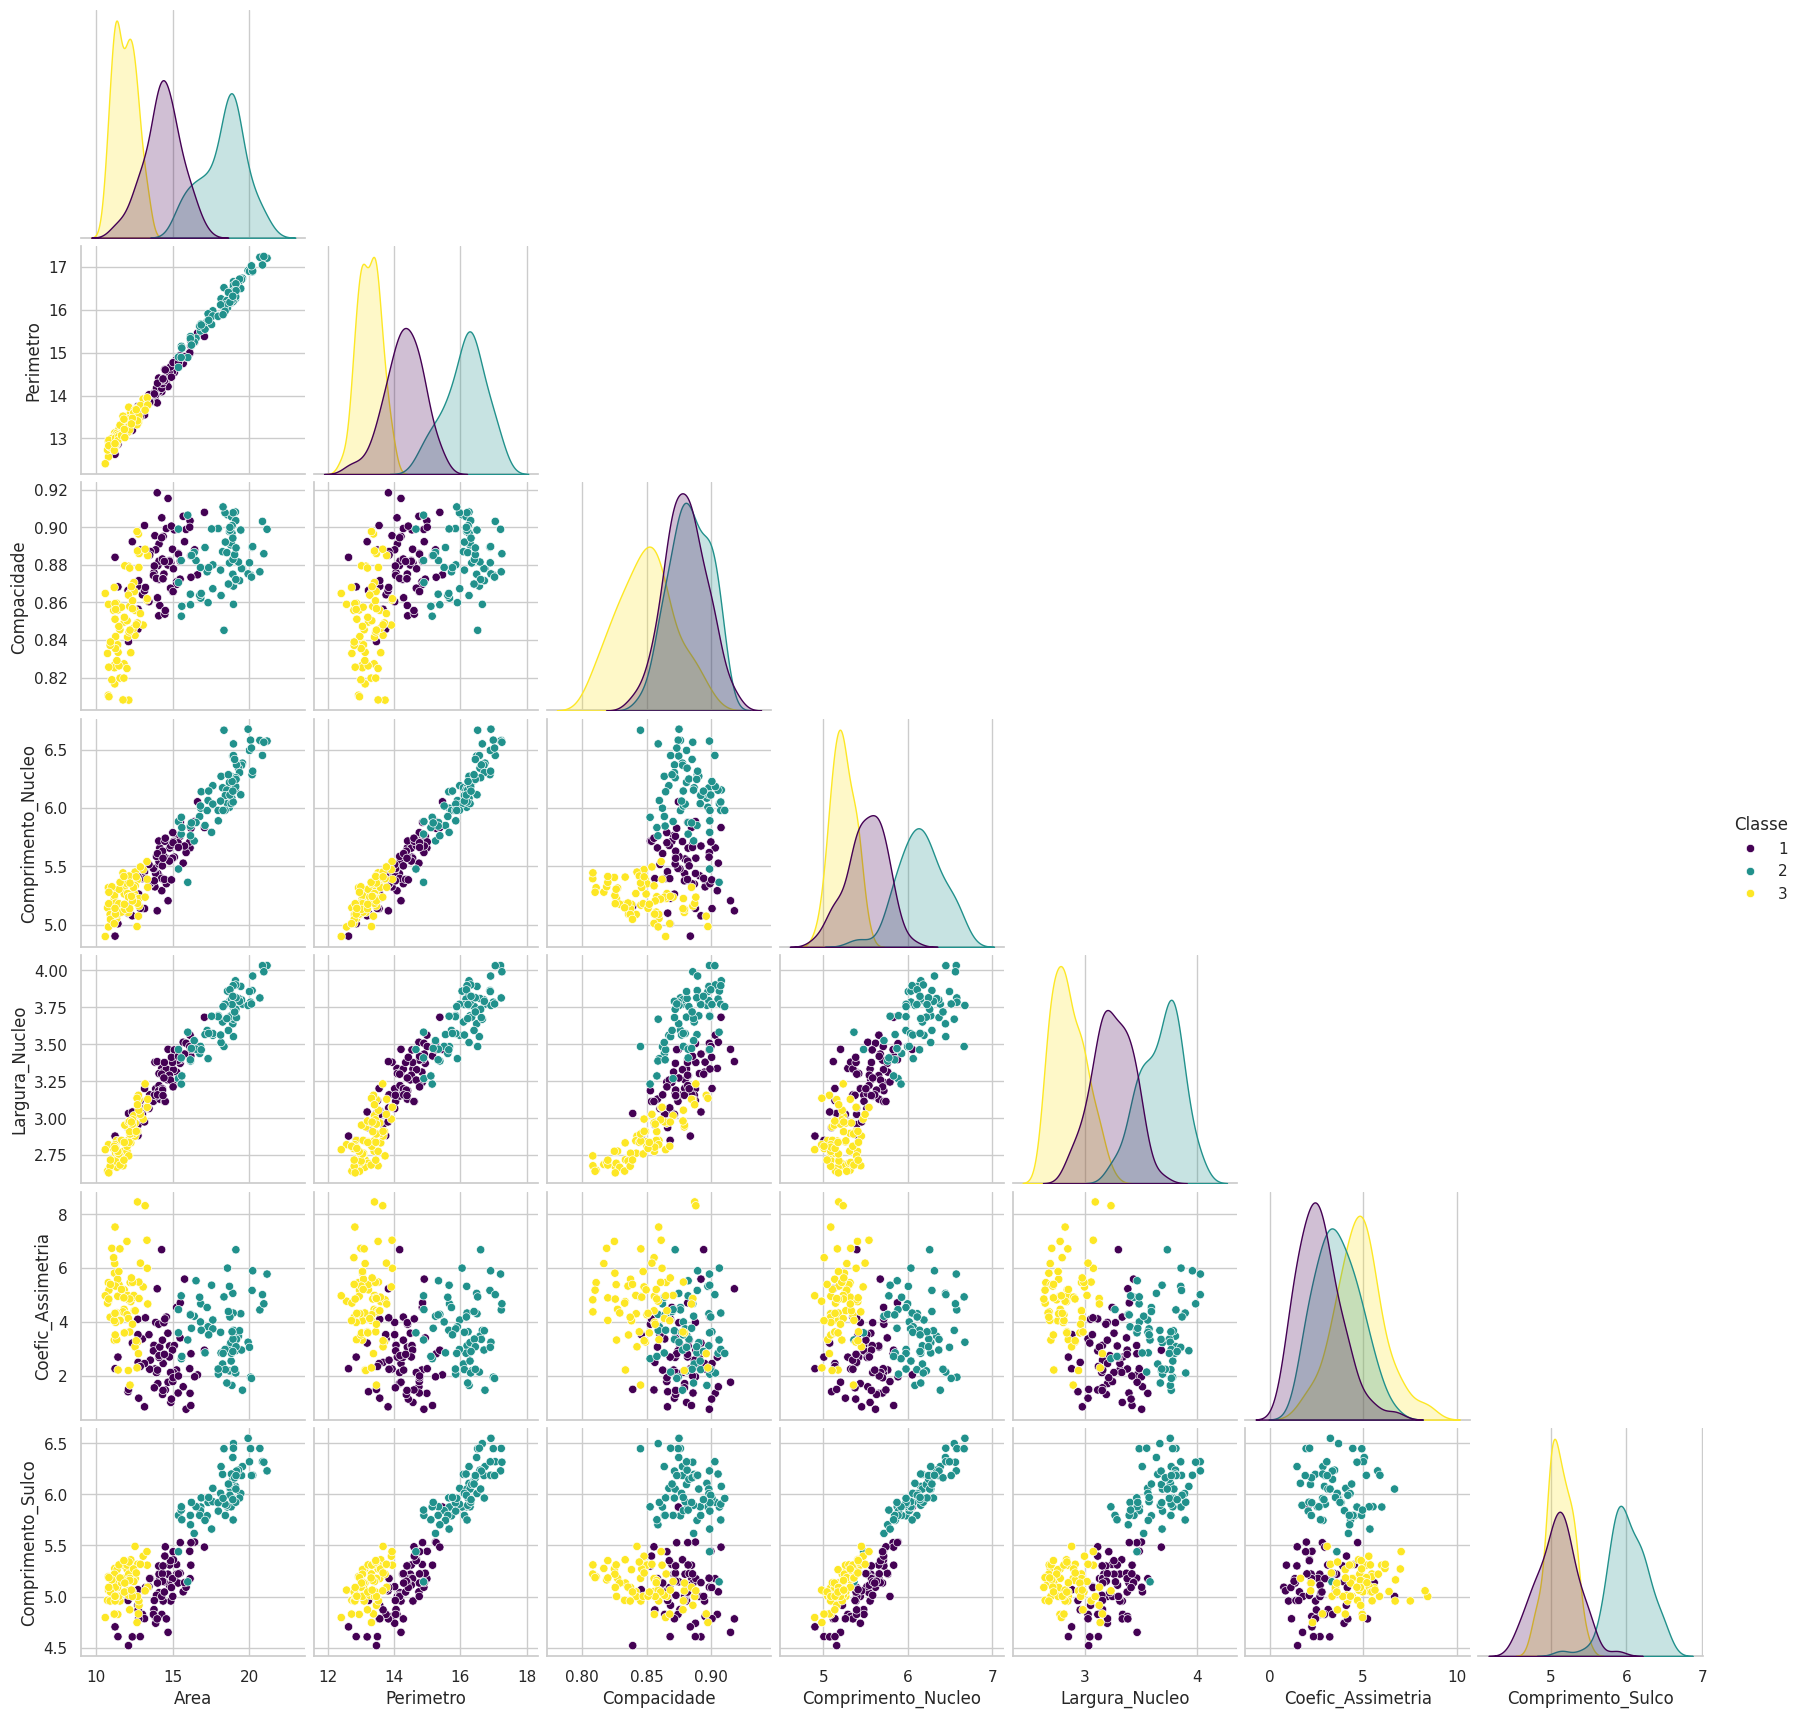

In [ ]:
# Verificação de nulos e tipos
print("--- Informações do Dataset ---")
df.info()

# Estatísticas descritivas
print("\n--- Estatísticas Descritivas ---")
display(df.describe())

# Matriz de Correlação
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação das Características')
plt.show()

# Distribuição das classes (Pairplot)
sns.pairplot(df, hue='Classe', palette='viridis', corner=True)
plt.show()

Divisão dos dados em treino (70%) e teste (30%) com estratificação para manter o balanceamento das classes. Aplicação de Padronização (StandardScaler) para colocar todas as variáveis na mesma escala, o que é essencial para modelos como KNN e SVM.

In [ ]:
# Separação X (features) e y (target)
X = df.drop('Classe', axis=1)
y = df['Classe']

# Divisão Treino/Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Padronização (Fit apenas no treino para evitar data leakage)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Tamanho do Treino: {X_train.shape}")
print(f"Tamanho do Teste: {X_test.shape}")

Tamanho do Treino: (147, 7)
Tamanho do Teste: (63, 7)


Treinamento e avaliação de três algoritmos de classificação:

KNN (K-Nearest Neighbors): Baseado em distância.

SVM (Support Vector Machine): Baseado em margens de separação.

Random Forest: Baseado em árvores de decisão.

--- Acurácia dos Modelos ---
KNN: 0.8730
SVM: 0.8730
Random Forest: 0.9206


/tmp/ipython-input-907160137.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(resultados.keys()), y=list(resultados.values()), palette='magma')


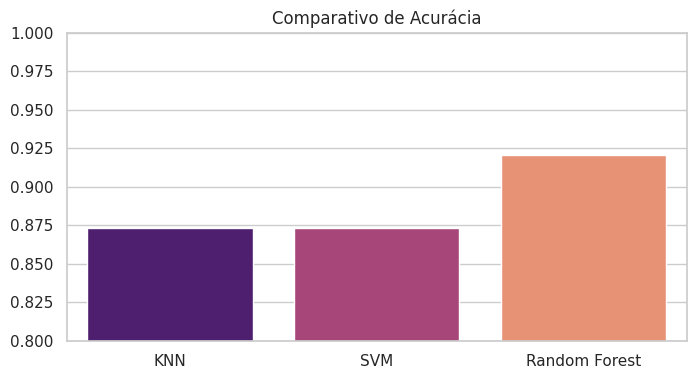

In [ ]:
resultados = {}

# 1. KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
resultados['KNN'] = accuracy_score(y_test, y_pred_knn)

# 2. SVM
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
resultados['SVM'] = accuracy_score(y_test, y_pred_svm)

# 3. Random Forest (não exige scaling, mas usaremos os dados originais X_train)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
resultados['Random Forest'] = accuracy_score(y_test, y_pred_rf)

# Exibindo Resultados
print("--- Acurácia dos Modelos ---")
for modelo, acc in resultados.items():
    print(f"{modelo}: {acc:.4f}")

# Gráfico comparativo
plt.figure(figsize=(8, 4))
sns.barplot(x=list(resultados.keys()), y=list(resultados.values()), palette='magma')
plt.ylim(0.8, 1.0)
plt.title('Comparativo de Acurácia')
plt.show()

Otimização de hiperparâmetros do modelo SVM utilizando GridSearchCV para tentar superar a performance base.

Melhores parâmetros encontrados: {'C': 100, 'gamma': 1, 'kernel': 'linear'}

--- Relatório de Classificação (Modelo Otimizado) ---
              precision    recall  f1-score   support

           1       0.85      0.81      0.83        21
           2       0.95      0.86      0.90        21
           3       0.88      1.00      0.93        21

    accuracy                           0.89        63
   macro avg       0.89      0.89      0.89        63
weighted avg       0.89      0.89      0.89        63



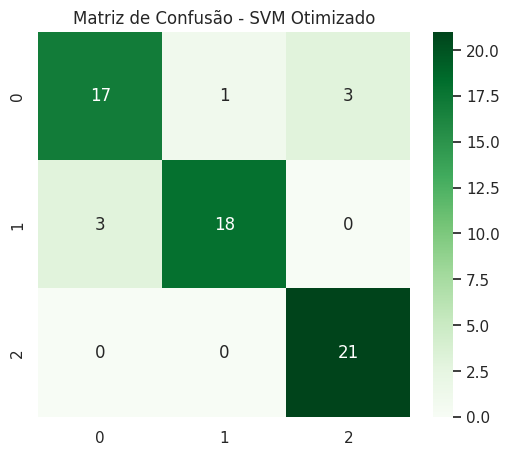

In [ ]:
# Parâmetros para testar
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

# Grid Search
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=0)
grid.fit(X_train_scaled, y_train)

print(f"Melhores parâmetros encontrados: {grid.best_params_}")
y_pred_grid = grid.predict(X_test_scaled)

print("\n--- Relatório de Classificação (Modelo Otimizado) ---")
print(classification_report(y_test, y_pred_grid))

# Matriz de Confusão
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_grid), annot=True, fmt='d', cmap='Greens')
plt.title('Matriz de Confusão - SVM Otimizado')
plt.show()

Conclusão e Insights: O modelo SVM otimizado (ou o Random Forest) apresentou excelente desempenho na classificação das variedades de trigo. A matriz de confusão mostra que as classes são bem distintas, havendo pouquíssima confusão entre as variedades Kama e Canadian, enquanto a variedade Rosa é quase sempre identificada corretamente devido à sua área maior. O pré-processamento com normalização foi crucial para o bom desempenho dos modelos baseados em distância.